In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
shot = 115
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picL))
FrameR = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

In [2]:
###################################
#Locate Features; single frame test
###################################
#init_index = 100
#f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
#plt.figure(figsize=[12,12])  # make a new figure
#tp.annotate(f, FrameL[init_index]);

In [3]:
#Show 'mass' distribution
#fig, ax = plt.subplots()
#ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');
#plt.show()

In [4]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fL = tp.batch(FrameL, 3, minmass=5);
tL = pred.link_df(fL, 3, memory=11,  diagnostics=True)
tL.to_csv('./Data/Shot{}/trackL_frame_inv.csv'.format(shot))

Frame 2002: 21 trajectories present


In [5]:
#tL = pd.read_csv('./Data/Shot{}/trackL_frame_inv.csv'.formate(shot))
tL.head()

,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y
0,NaN,NaN,NaN,NaN,NaN,0.285714,0.0,0,11.850273,0.0,26.0,3.209449,0.853913,179.000000,56.145833
1,NaN,NaN,NaN,NaN,NaN,0.369565,0.0,0,15.553484,1.0,35.0,4.196972,0.854493,182.888889,59.111111
2,NaN,NaN,NaN,NaN,NaN,0.419355,0.0,0,10.615870,2.0,23.0,2.962568,0.849076,1092.860465,60.023256
3,NaN,NaN,NaN,NaN,NaN,0.531250,0.0,0,11.109631,3.0,25.0,3.209449,0.843274,1088.133333,61.000000
4,NaN,NaN,NaN,NaN,NaN,0.400000,0.0,0,13.825319,4.0,26.0,3.950091,0.845154,885.000000,240.000000


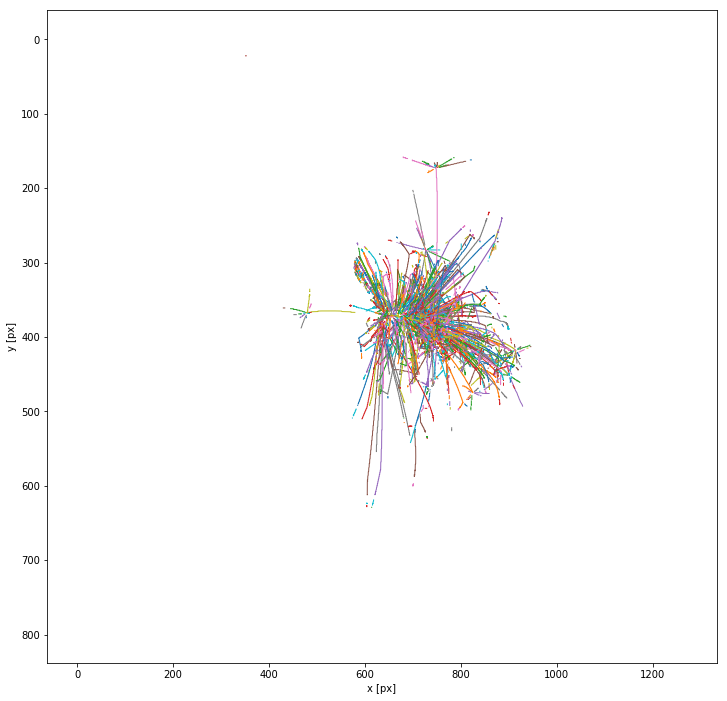

In [6]:
plt.figure(figsize=[12,12])
tp.plot_traj(tL);

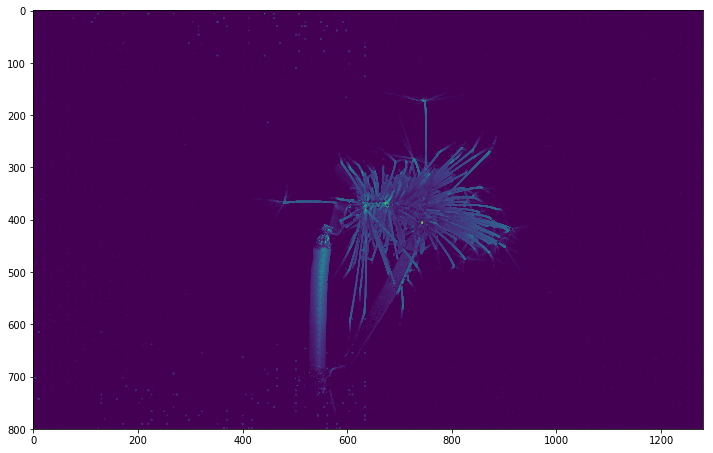

In [7]:
plt.figure(figsize=[12,12])
plt.imshow(v0L+bk0L)
#plt.scatter(tL['x'],tL['y'],s=0.3,c='g')
plt.scatter(tL['x'],tL['y'],s=0.3,c=tL['mass'])
plt.show()

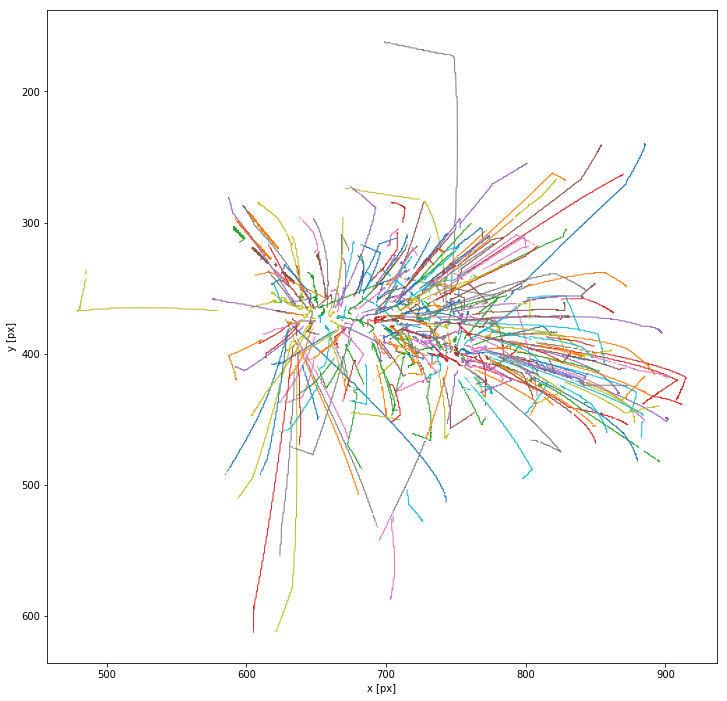

In [8]:
# Remove tracks too few points (less than 500)
tL1 = tp.filter_stubs(tL,200)
plt.figure(figsize=[12,12])
tp.plot_traj(tL1);

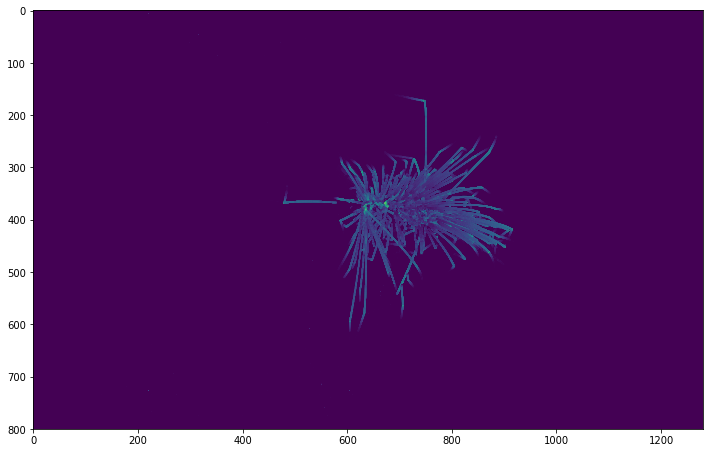

In [9]:
plt.figure(figsize=[12,12])
plt.imshow(v0L)
plt.scatter(tL1['x'],tL1['y'],s=0.3,c=tL1['mass'])
#plt.scatter(tL1['x'],tL1['y'],s=0.3,c='r')
plt.show()

In [10]:
tL2 = tL1
range_limit = 10
Range = {}
for ii in tL2['particle'].unique():
    Track = tL2[tL2['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    ra = math.sqrt((xmax-xmin)*(xmax-xmin)+(ymax-ymin)*(ymax-ymin))
    Range[ii] = ra

In [11]:
RANGE = []
for ii in range(len(tL2)):
    RANGE.append(Range[tL2['particle'].iloc[ii]])
    #print(ii,Range[tL2['particle'].iloc[ii]])

In [12]:
tL2['range'] = RANGE

In [13]:
tL2.head()

,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y,range
frame,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,0.400000,0.0,0,13.825319,4.0,26.0,3.950091,0.845154,885.000000,240.000000,157.018865
0,NaN,NaN,NaN,NaN,NaN,0.395833,0.0,0,31.600729,6.0,68.0,7.900182,0.866025,601.101562,291.992188,35.599383
0,NaN,NaN,NaN,NaN,NaN,0.359477,0.0,0,53.079350,12.0,126.0,15.306603,0.843580,766.948837,368.120930,40.474716
0,NaN,NaN,NaN,NaN,NaN,0.423358,0.0,0,48.388616,14.0,116.0,14.565961,0.836050,732.969388,382.045918,2.143374
0,NaN,NaN,NaN,NaN,NaN,0.437086,0.0,0,52.832469,15.0,129.0,15.553484,0.840004,732.070093,393.046729,38.276166


In [14]:
tL3 = tL2[tL2['range']>20]

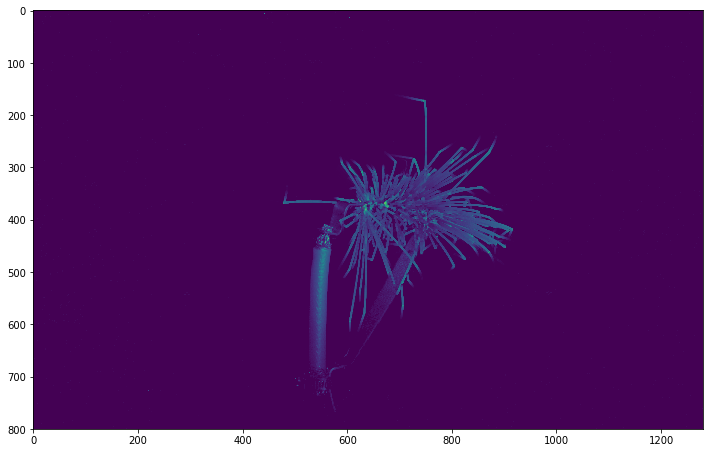

In [15]:
plt.figure(figsize=[12,12])
plt.imshow(v0L+bk0L)
plt.scatter(tL3['x'],tL3['y'],s=0.3,c=tL3['mass'])
#plt.scatter(tL3['x'],tL3['y'],s=0.1,c='g')
plt.savefig('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/sumTrackL.tif'.format(shot,shot,picL))
plt.show()

In [16]:
'''
for ii in tL3['particle'].unique():
#for ii in range(3,4):  
    #print(ii)
    Track = tL3[tL3['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    plt.figure(figsize=[12,12])
    plt.imshow(v0L)
    plt.scatter(Track['x'],Track['y'],s=0.7,c=Track['mass'])
    plt.ylim(ymin-10,ymax+10)
    plt.xlim(xmin-10,xmax+10)
    plt.savefig("./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/trackL_framebk_{}.tif".format(shot,shot,picL,int(ii)))
'''

'\nfor ii in tL3[\'particle\'].unique():\n#for ii in range(3,4):  \n    #print(ii)\n    Track = tL3[tL3[\'particle\']==ii]\n    xmax = np.max(Track[\'x\'])\n    xmin = np.min(Track[\'x\'])\n    ymax = np.max(Track[\'y\'])\n    ymin = np.min(Track[\'y\'])\n    plt.figure(figsize=[12,12])\n    plt.imshow(v0L)\n    plt.scatter(Track[\'x\'],Track[\'y\'],s=0.7,c=Track[\'mass\'])\n    plt.ylim(ymin-10,ymax+10)\n    plt.xlim(xmin-10,xmax+10)\n    plt.savefig("./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/trackL_framebk_{}.tif".format(shot,shot,picL,int(ii)))\n'

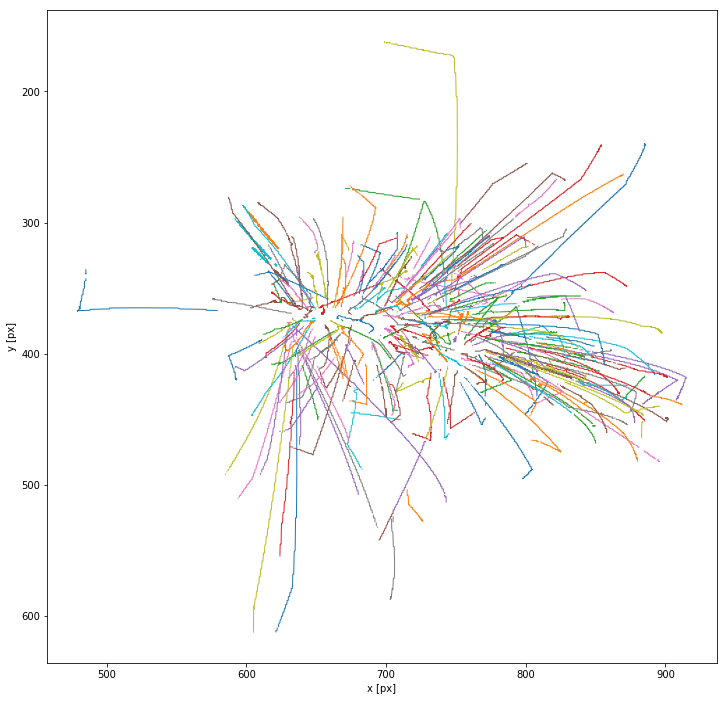

In [17]:
plt.figure(figsize=[12,12])
tp.plot_traj(tL3);

In [18]:
tL3.to_csv('./Data/Shot{}/trackL3_frame_inv.csv'.format(shot))

In [19]:
tL3.head()

,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame,mass,particle,raw_mass,signal,size,x,y,range
frame,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,0.400000,0.0,0,13.825319,4.0,26.0,3.950091,0.845154,885.000000,240.000000,157.018865
0,NaN,NaN,NaN,NaN,NaN,0.395833,0.0,0,31.600729,6.0,68.0,7.900182,0.866025,601.101562,291.992188,35.599383
0,NaN,NaN,NaN,NaN,NaN,0.359477,0.0,0,53.079350,12.0,126.0,15.306603,0.843580,766.948837,368.120930,40.474716
0,NaN,NaN,NaN,NaN,NaN,0.437086,0.0,0,52.832469,15.0,129.0,15.553484,0.840004,732.070093,393.046729,38.276166
0,NaN,NaN,NaN,NaN,NaN,0.454545,0.0,0,46.413571,16.0,99.0,13.825319,0.837931,783.968085,401.000000,47.366911
